<a href="https://colab.research.google.com/github/smaranjitghose/PyNoiseReduce/blob/master/PyNoiseReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Dependencies

In [0]:
!pip install tensorflow-gpu==2.0.0-beta0
!pip install librosa
!pip install soundfile
!pip install noisereduce

  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp36-none-any.whl size=7608 sha256=206dc517aef939da68ae9daf1de225389ac137330f581db8dc298de17d205568
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce


# Importing dependencies

In [0]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Loading the data

In [0]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [0]:
IPython.display.Audio(data=data, rate=rate)

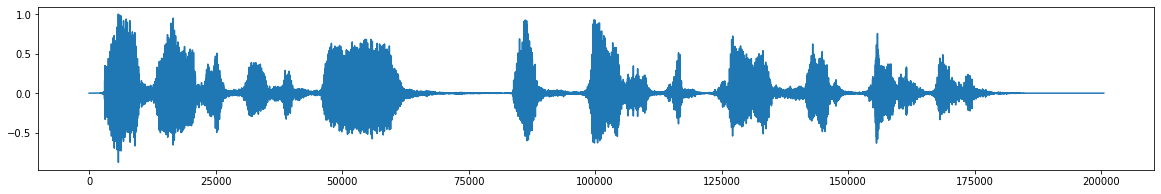

In [0]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

## Adding Noise to our file

In [0]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

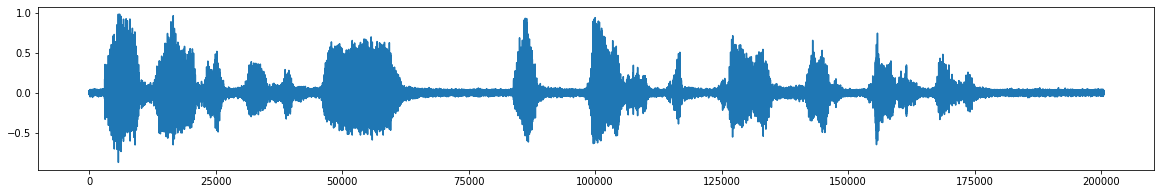

In [0]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [0]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

### Removing the noise

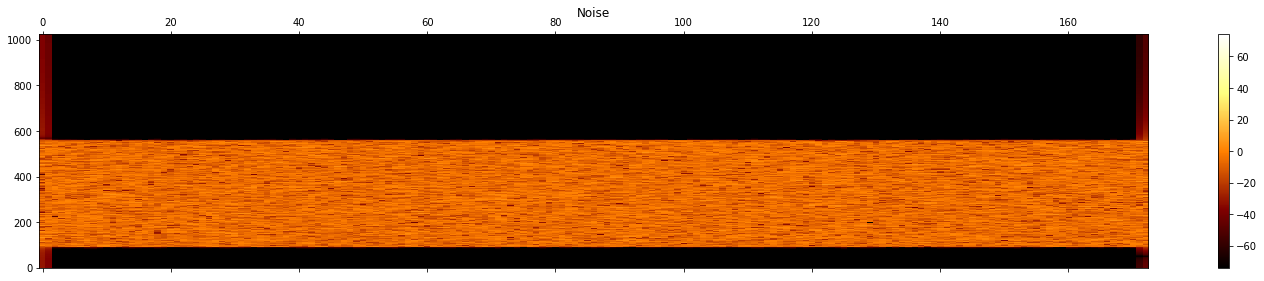

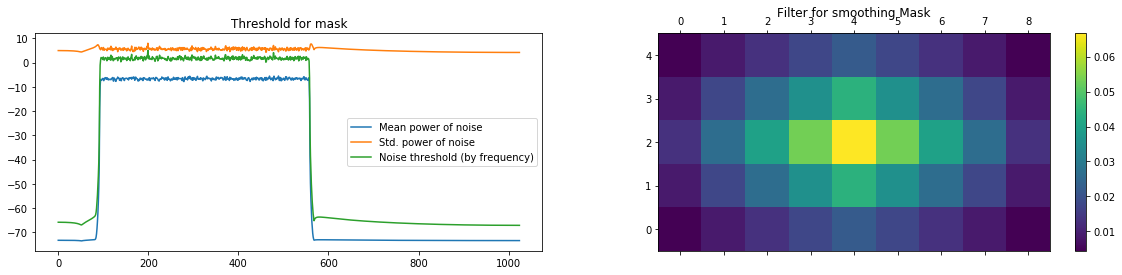

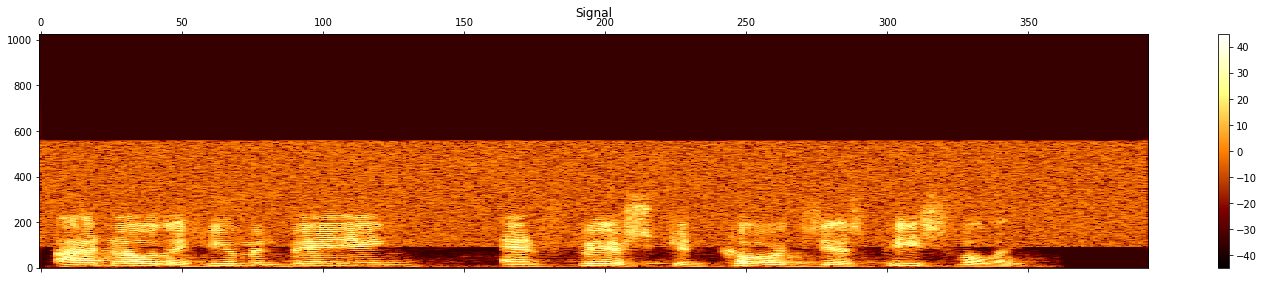

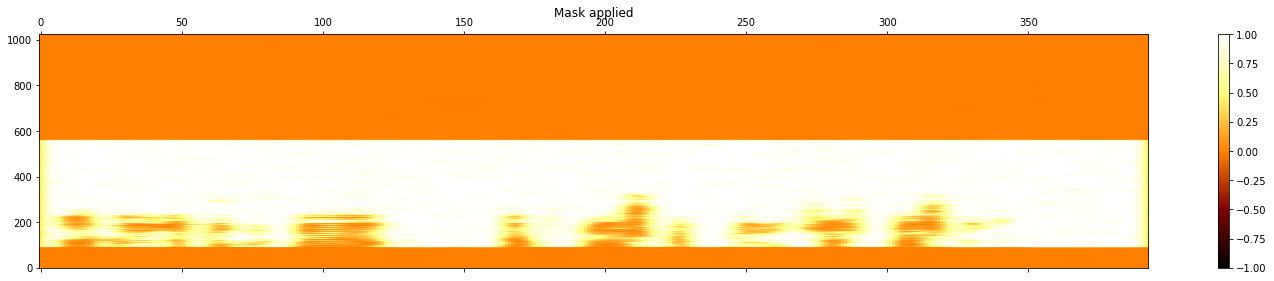

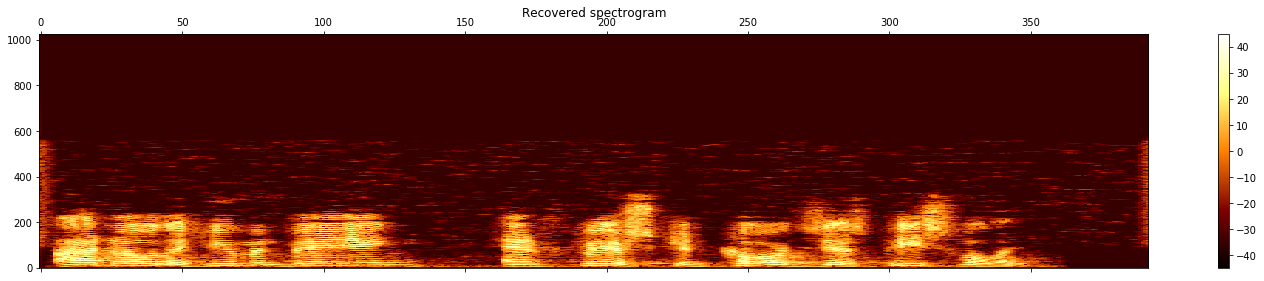

In [0]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)

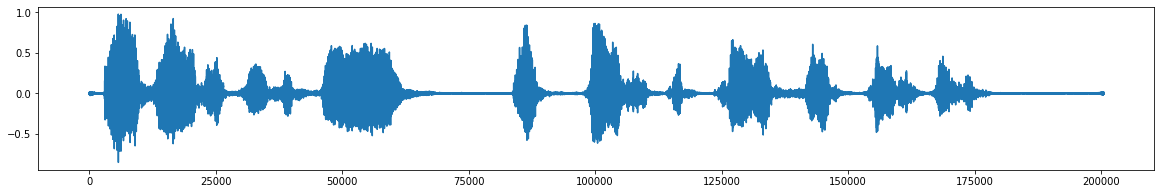

In [0]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [0]:
IPython.display.Audio(data=noise_reduced, rate=rate)

## A more difficult example 

In [0]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

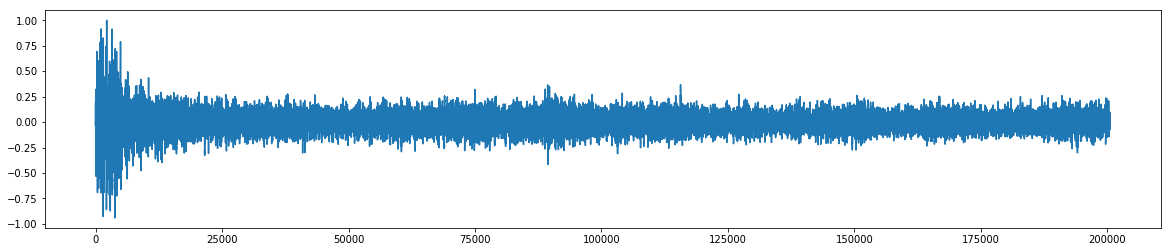

In [0]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [0]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

In [0]:
max(noise_data)

0.999969482421875

### adding noise to data

In [0]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

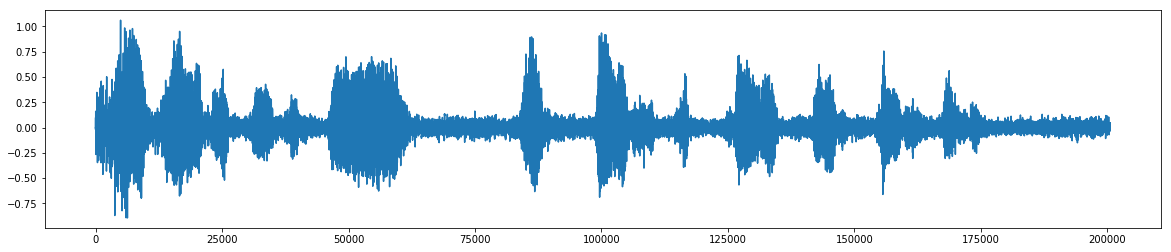

In [0]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)

IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

### reducing noise

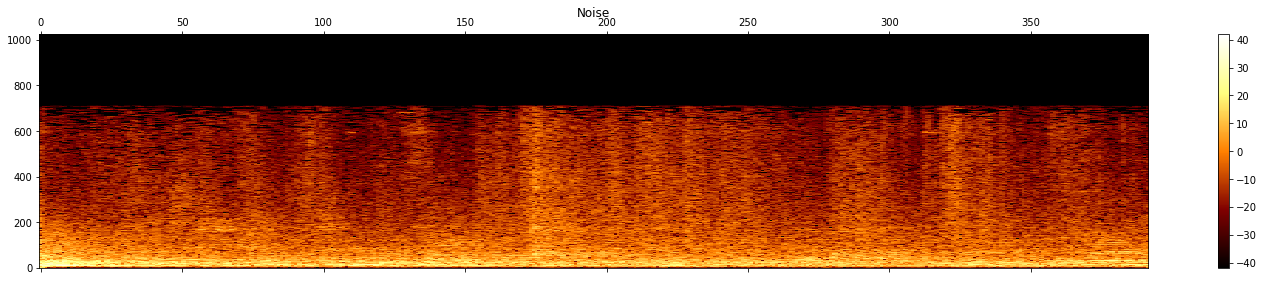

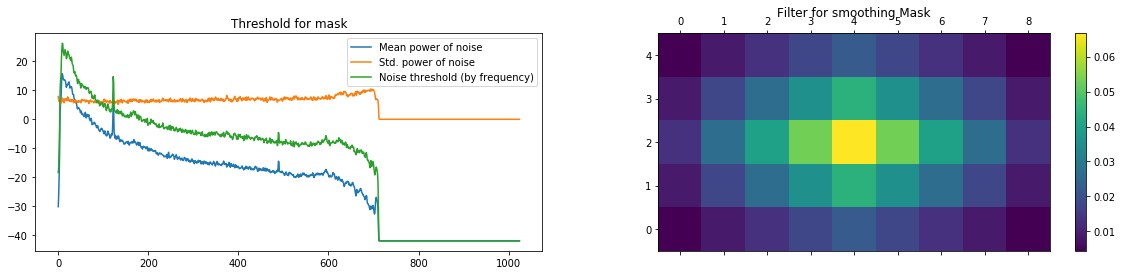

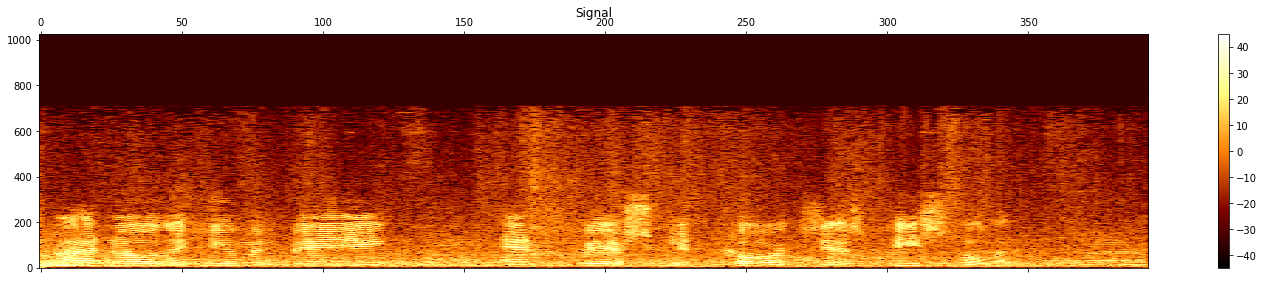

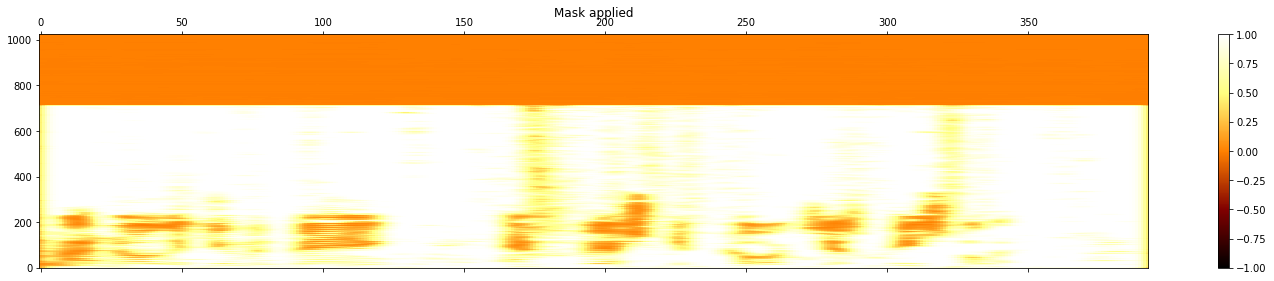

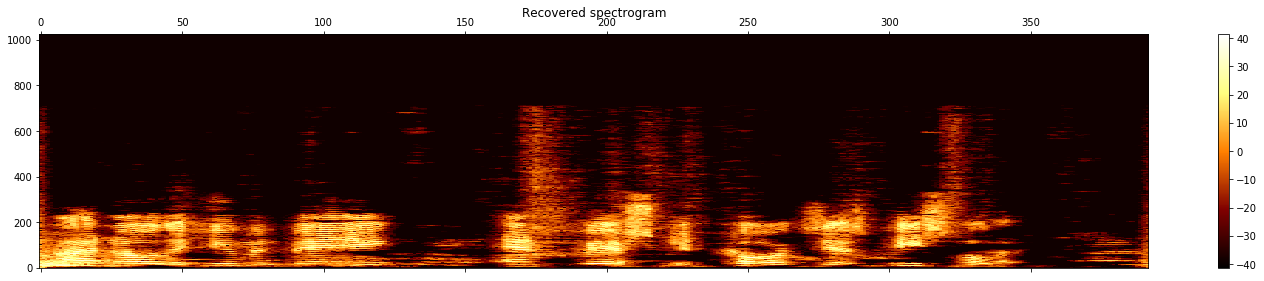

In [0]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe, noise_clip=noise_clip, verbose=True)

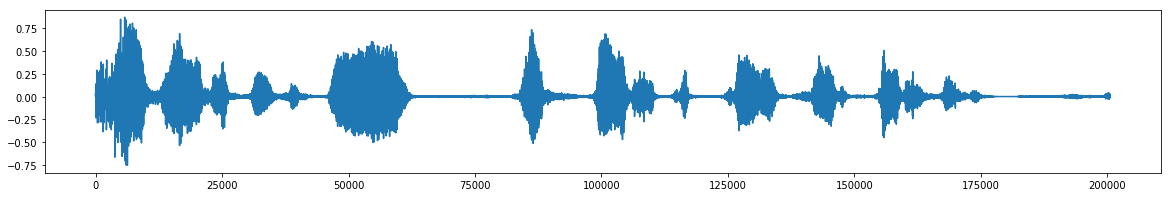

In [0]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [0]:
IPython.display.Audio(data=noise_reduced, rate=rate)

## Use tensorflow as the backend for noise reduction

In [0]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3

In [0]:
len(noise_reduced), len(audio_clip_cafe)

(200542, 200542)

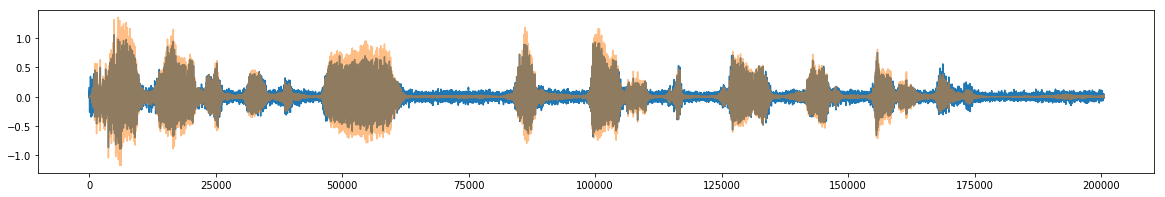

In [0]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(noise_reduced, alpha = 0.5)

In [0]:
IPython.display.Audio(data=noise_reduced, rate=rate)

### Comparing the time required

In [0]:
%%timeit
# non-tensorflow
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=False, 
                                verbose=False)

74.8 ms ± 526 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [0]:
%%timeit
# Use tensorflow
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

490 ms ± 7.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Taking some longer clips into consideration


In [0]:
# make a longer clip by repeating the same clip a few times
longer_clip = np.concatenate([audio_clip_cafe.astype('float32') for i in range(100)])
print("Clip is {} seconds long.".format(round(len(longer_clip)/rate)))

Clip is 455 seconds long.


In [0]:
%%time
# non-tensorflow
noise_reduced = nr.reduce_noise(audio_clip=longer_clip,
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=False, 
                                verbose=False)

CPU times: user 7.72 s, sys: 1.81 s, total: 9.54 s
Wall time: 9.54 s


In [0]:
%%time
# use tensorflow
noise_reduced = nr.reduce_noise(audio_clip=longer_clip,
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

CPU times: user 1min 11s, sys: 5.71 s, total: 1min 17s
Wall time: 37.8 s
